In [1]:
import librosa
import audio_io

audio_dict = audio_io.load_list(["vrm.wav", "commentary.wav"], 44100)
main_raw = audio_dict["vrm.wav"][0]
side_raw = audio_dict["commentary.wav"][0]



done!
done!


In [2]:
import plotting
import librosa
import processing
import numpy as np

trims = processing.squash_and_trim([main_raw, side_raw], 656679)

print(np.shape(main_raw))
print(np.shape(side_raw))

(2, 656679)
(2, 670791)


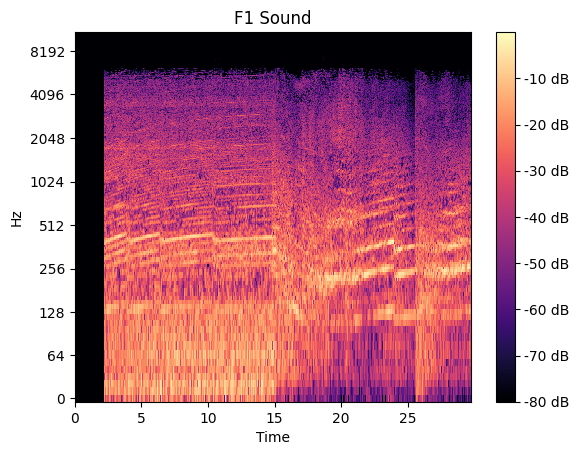

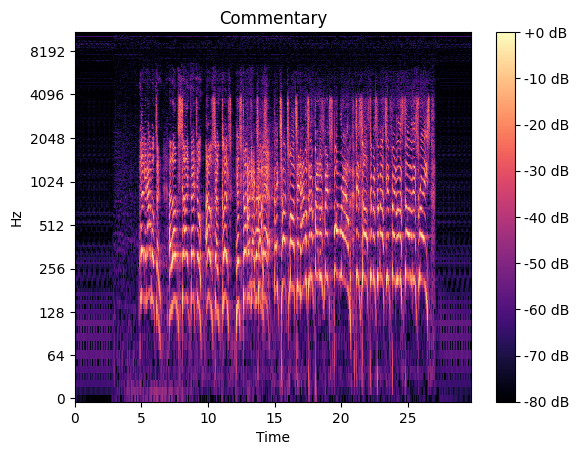

In [3]:
main_spectogram, _ = processing.calc_spectogram(trims[0])
plotting.plot_spectogram(main_spectogram, "F1 Sound")


side_spectogram, _ = processing.calc_spectogram(trims[1])
plotting.plot_spectogram(side_spectogram, "Commentary")



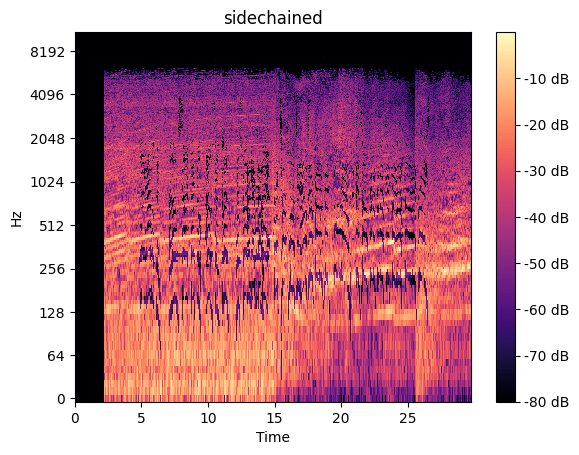

In [4]:
sidechained_sc = processing.compress_spect_slice(-80, 4, side_spectogram, main_spectogram)

plotting.plot_spectogram(sidechained_sc, "sidechained")